In [1]:
import pandas as pd
import numpy as np
playstore = pd.read_csv('googleplaystore.csv')

In [2]:
playstore.shape

(10841, 13)

In [3]:
playstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
playstore.drop(labels=10472, inplace=True)

In [5]:
playstore.shape

(10840, 13)

In [6]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
#covert filesize string into float 
def clean_size(size):
    size = size.replace('M',"")
    if size.endswith('k'):
        size = float(size[:-1])/1000
    elif size == 'Varies with device':
        size = np.NaN
    else:
        size = float(size)
    return size

In [8]:
#convert price from sting into float
playstore['Price'] = playstore['Price'].str.replace('$','').astype(float)

In [9]:
# focus on paid apps
paid = playstore[playstore['Type']=='Paid'].copy()

In [10]:
paid.drop('Type', axis='columns', inplace=True)

In [11]:
paid.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [12]:
#covert string into int
paid['Reviews'] = paid['Reviews'].astype(int)

In [13]:
paid['Size']=paid['Size'].apply(clean_size).astype(float)

In [14]:
paid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 234 to 10798
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             800 non-null    object 
 1   Category        800 non-null    object 
 2   Rating          647 non-null    float64
 3   Reviews         800 non-null    int32  
 4   Size            724 non-null    float64
 5   Installs        800 non-null    object 
 6   Price           800 non-null    float64
 7   Content Rating  800 non-null    object 
 8   Genres          800 non-null    object 
 9   Last Updated    800 non-null    object 
 10  Current Ver     798 non-null    object 
 11  Android Ver     799 non-null    object 
dtypes: float64(3), int32(1), object(8)
memory usage: 78.1+ KB


In [15]:
paid.sort_values('Reviews', ascending=False, inplace=True)

In [16]:
paid.shape

(800, 12)

In [18]:
paid.drop_duplicates('App',inplace=True)

In [19]:
paid.shape

(756, 12)

In [20]:
print(paid.duplicated(subset='App').sum())

0


In [21]:
# drop = True to remove old index
paid.reset_index(inplace=True, drop=True)

In [23]:
#find apps below 50
affordable_apps = paid[paid['Price']<50].copy()
affordable_apps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device
1,Hitman Sniper,GAME,4.6,408292,29.000,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.000,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up
3,Bloons TD 5,FAMILY,4.6,190086,94.000,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up
4,Where's My Water?,FAMILY,4.7,188740,69.000,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...
749,Bi-Tank Ads Free,GAME,NaN,0,NaN,1+,0.99,Everyone,Arcade,"July 31, 2017",1.1,4.1 and up
750,BI Barcode Scanner,PRODUCTIVITY,NaN,0,0.473,10+,0.99,Everyone,Productivity,"June 13, 2014",2.2,2.2 and up
751,Bk Bee Sales Manager,BUSINESS,NaN,0,2.100,5+,0.99,Everyone,Business,"December 16, 2017",1.0,4.1 and up
752,Monitor My BP,HEALTH_AND_FITNESS,NaN,0,4.600,50+,5.99,Everyone,Health & Fitness,"November 26, 2016",2.0.1,4.0 and up


In [24]:
#create mask to categorize
cheap = affordable_apps['Price']<5
reasonable = affordable_apps['Price']>5

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

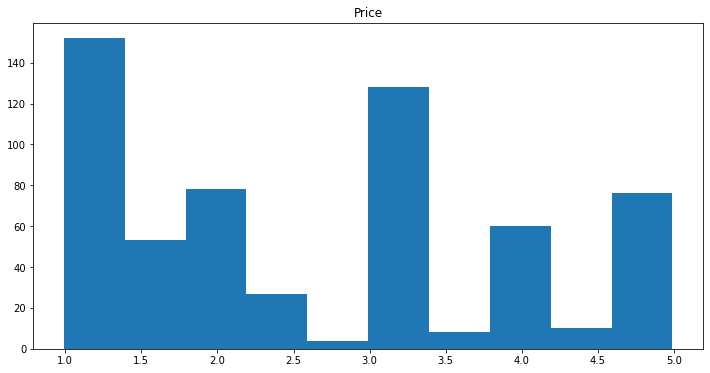

In [25]:
affordable_apps[cheap].hist(column='Price', grid=False, figsize=(12,6))

array([[<AxesSubplot:title={'center':'Price'}>]], dtype=object)

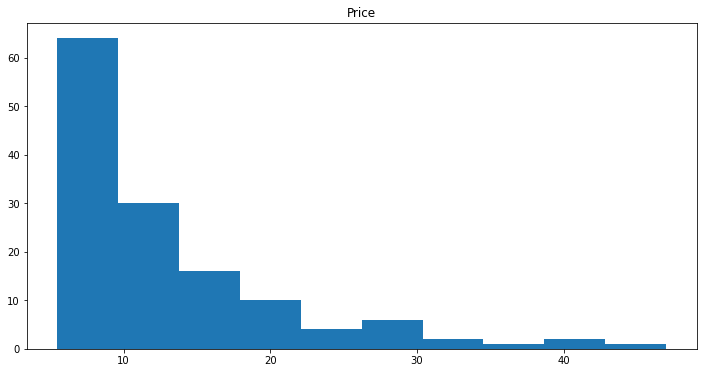

In [26]:
affordable_apps[reasonable].hist(column='Price', grid=False, figsize=(12,6))

In [27]:
affordable_apps['affordability'] = affordable_apps.apply(lambda row:'cheap' if row['Price'] <5 else 'reasonable', axis=1)

In [28]:
affordable_apps

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable
1,Hitman Sniper,GAME,4.6,408292,29.000,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.000,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable
3,Bloons TD 5,FAMILY,4.6,190086,94.000,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap
4,Where's My Water?,FAMILY,4.7,188740,69.000,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,Bi-Tank Ads Free,GAME,NaN,0,NaN,1+,0.99,Everyone,Arcade,"July 31, 2017",1.1,4.1 and up,cheap
750,BI Barcode Scanner,PRODUCTIVITY,NaN,0,0.473,10+,0.99,Everyone,Productivity,"June 13, 2014",2.2,2.2 and up,cheap
751,Bk Bee Sales Manager,BUSINESS,NaN,0,2.100,5+,0.99,Everyone,Business,"December 16, 2017",1.0,4.1 and up,cheap
752,Monitor My BP,HEALTH_AND_FITNESS,NaN,0,4.600,50+,5.99,Everyone,Health & Fitness,"November 26, 2016",2.0.1,4.0 and up,reasonable


In [29]:
cheap = affordable_apps['Price'] <5
reasonable = affordable_apps['Price'] >=5

In [30]:
cheap_mean = affordable_apps.loc[cheap,'Price'].mean()
cheap_mean

2.5803187919463153

In [31]:
affordable_apps.loc[cheap,'price_criterion'] = affordable_apps['Price'].apply(lambda price:1 if price<cheap_mean else 0)
affordable_apps.loc[cheap,'price_criterion']

1      1.0
3      0.0
4      1.0
5      0.0
6      1.0
      ... 
748    1.0
749    1.0
750    1.0
751    1.0
755    1.0
Name: price_criterion, Length: 596, dtype: float64

<AxesSubplot:xlabel='Price', ylabel='Rating'>

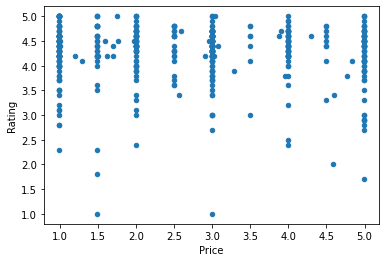

In [34]:
affordable_apps[cheap].plot(kind='scatter', x='Price', y='Rating')

In [35]:
print(affordable_apps[cheap].corr().loc['Rating','Price'])

-0.05593771505463038


This is good news for our price tweaking strategy, because it suggests that we can change prices without it being reflected in the apps' rating.We can increase the price of those apps that cost less than, say, the mean cheap price, to the mean cheap price. We would then monitor the behavior of these apps — possibly by using statistical techniques like hypothesis testing, which you'll learn later — to confirm that there is an increase in profits.

<AxesSubplot:xlabel='Price', ylabel='Rating'>

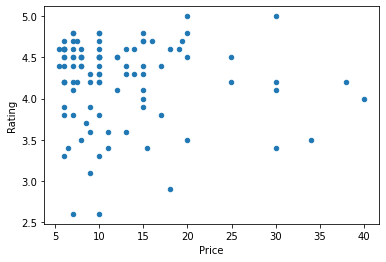

In [32]:
affordable_apps[reasonable].plot(kind='scatter', x='Price', y='Rating')

In [36]:
print(affordable_apps[reasonable].corr().loc['Rating','Price'])

-0.048609647085130735


In [33]:
reasonable_mean = affordable_apps.loc[reasonable, 'Price'].mean()
reasonable_mean

12.448686131386868

In [38]:
affordable_apps.loc[reasonable,'price_criterion'] = affordable_apps['Price'].apply(lambda price:1 if price < reasonable_mean else 0)
affordable_apps.loc[reasonable,'price_criterion']

0      1.0
2      1.0
13     1.0
21     1.0
27     1.0
      ... 
720    1.0
721    1.0
730    0.0
735    0.0
752    1.0
Name: price_criterion, Length: 137, dtype: float64

In [39]:
affordable_apps['genre_count'] = affordable_apps['Genres'].str.count(';')+1
affordable_apps['genre_count']

0      2
1      1
2      1
3      1
4      2
      ..
749    1
750    1
751    1
752    1
755    1
Name: genre_count, Length: 733, dtype: int64

In [40]:
genres_mean = affordable_apps.groupby(['affordability','genre_count']).mean()[['Price']]
genres_mean

Price
affordability genre_count           
cheap         1             2.507448
              2             3.155672
reasonable    1            12.574627
              2             6.823333

In [41]:
#For each segment in genres_mean ,labels the apps that cost less than its segment's mean with `1`
#and the others with `0`.
def label_genres(row):
    aff = row['affordability']
    gc = row['genre_count']
    price = row['Price']
    
    if price< genres_mean.loc[(aff,gc)][0]:
        return 1
    else:
        return 0
    
affordable_apps['genre_criterion'] = affordable_apps.apply(label_genres, axis='columns')
affordable_apps['genre_criterion']

0      0
1      1
2      1
3      0
4      1
      ..
749    1
750    1
751    1
752    1
755    1
Name: genre_criterion, Length: 733, dtype: int64

In [42]:
categories_mean = affordable_apps.groupby(['affordability', 'Category']).mean()[['Price']]
categories_mean

Price
affordability Category                      
cheap         ART_AND_DESIGN        1.990000
              AUTO_AND_VEHICLES     1.740000
              BOOKS_AND_REFERENCE   2.529286
              BUSINESS              3.632857
              COMMUNICATION         2.428846
              DATING                3.115000
              EDUCATION             3.990000
              ENTERTAINMENT         3.990000
              FAMILY                2.762710
              FINANCE               3.490000
              FOOD_AND_DRINK        4.240000
              GAME                  2.547222
              HEALTH_AND_FITNESS    3.035455
              LIBRARIES_AND_DEMO    0.990000
              LIFESTYLE             2.895000
              MAPS_AND_NAVIGATION   1.656667
              MEDICAL               2.764286
              NEWS_AND_MAGAZINES    1.990000
              PARENTING             4.790000
              PERSONALIZATION       1.689873
              PHOTOGRAPHY           3.023571
              PRODUCTIVITY          2.635909
              SHOPPING              2.740000
              SOCIAL                0.990000
              SPORTS                2.773636
              TOOLS                 2.596056
              TRAVEL_AND_LOCAL      2.942222
              VIDEO_PLAYERS         1.490000
              WEATHER               3.240000
reasonable    AUTO_AND_VEHICLES     9.990000
              BOOKS_AND_REFERENCE   6.025714
              BUSINESS             14.967500
              COMMUNICATION        19.990000
              DATING                7.490000
              EDUCATION             5.990000
              FAMILY               15.426800
              FINANCE              21.240000
              GAME                 10.091000
              HEALTH_AND_FITNESS    7.740000
              LIFESTYLE            17.323333
              MAPS_AND_NAVIGATION  10.990000
              MEDICAL              13.805789
              PERSONALIZATION       8.490000
              PHOTOGRAPHY          15.190000
              PRODUCTIVITY          7.590000
              SOCIAL               13.990000
              SPORTS               19.490000
              TOOLS                11.847143
              TRAVEL_AND_LOCAL      7.823333
              VIDEO_PLAYERS         5.990000
              WEATHER               6.490000

In [43]:
def label_categories(row):
    aff = row['affordability']
    cat = row['Category']
    price = row['Price']
    
    if price < categories_mean.loc[(aff,cat)][0]:
        return 1
    else:
        return 0
affordable_apps['category_criterion'] = affordable_apps.apply(label_categories, axis='columns')
affordable_apps['category_criterion']

0      1
1      1
2      1
3      0
4      1
      ..
749    1
750    1
751    1
752    1
755    1
Name: category_criterion, Length: 733, dtype: int64

In [45]:
# criteria to decide should increase price
criteria = ['price_criterion','genre_criterion','category_criterion']

In [46]:
# summarize the criteria into results as mode is 0/1
affordable_apps['Result'] = affordable_apps[criteria].mode(axis='columns')
affordable_apps['Result']

0      1.0
1      1.0
2      1.0
3      0.0
4      1.0
      ... 
749    1.0
750    1.0
751    1.0
752    1.0
755    1.0
Name: Result, Length: 733, dtype: float64

In [48]:
#randomly take 5 samples
affordable_apps.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result
360,Don't Panic with Andrew J.,BOOKS_AND_REFERENCE,4.5,124,NaN,"5,000+",2.99,Everyone,Books & Reference,"August 25, 2015",Varies with device,Varies with device,cheap,0.0,1,0,0,0.0
559,CSCS BG (в български),FAMILY,2.4,7,2.1,100+,3.99,Everyone,Education,"March 23, 2017",1.0,4.0.3 and up,cheap,0.0,1,0,0,0.0
749,Bi-Tank Ads Free,GAME,NaN,0,NaN,1+,0.99,Everyone,Arcade,"July 31, 2017",1.1,4.1 and up,cheap,1.0,1,1,1,1.0
63,Mind Games Pro,FAMILY,4.6,15301,18.0,"100,000+",2.99,Everyone,Puzzle;Brain Games,"July 18, 2018",3.0.5,2.3 and up,cheap,0.0,2,1,0,0.0
454,Wolf of the BF:Commando MOBILE,GAME,3.4,32,27.0,"1,000+",0.99,Everyone 10+,Arcade,"March 23, 2017",1.00.10,4.0 and up,cheap,1.0,1,1,1,1.0


In [50]:
#compare the mean price and take the max value
def new_price(row):
    if row['affordability'] == 'cheap':
        return round(max(row['Price'], cheap_mean), 2)
    else:
        return round(max(row['Price'], reasonable_mean), 2)
affordable_apps['New Price'] = affordable_apps.apply(new_price, axis='columns')
affordable_apps['New Price'] 

0      12.45
1       2.58
2      12.45
3       2.99
4       2.58
       ...  
749     2.58
750     2.58
751     2.58
752    12.45
755     2.58
Name: New Price, Length: 733, dtype: float64

In [51]:
affordable_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,affordability,price_criterion,genre_count,genre_criterion,category_criterion,Result,New Price
0,Minecraft,FAMILY,4.5,2376564,NaN,"10,000,000+",6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,reasonable,1.0,2,0,1,1.0,12.45
1,Hitman Sniper,GAME,4.6,408292,29.0,"10,000,000+",0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,cheap,1.0,1,1,1,1.0,2.58
2,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,"1,000,000+",6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,reasonable,1.0,1,1,1,1.0,12.45
3,Bloons TD 5,FAMILY,4.6,190086,94.0,"1,000,000+",2.99,Everyone,Strategy,"July 13, 2018",3.16,2.3.3 and up,cheap,0.0,1,0,0,0.0,2.99
4,Where's My Water?,FAMILY,4.7,188740,69.0,"1,000,000+",1.99,Everyone,Puzzle;Brain Games,"July 5, 2018",1.16.0,4.2 and up,cheap,1.0,2,1,1,1.0,2.58


In [52]:
affordable_apps['Installs'] = affordable_apps['Installs'].str.replace('[+,]','').astype(int)

In [53]:
affordable_apps['Impact'] = (affordable_apps['New Price']-affordable_apps['Price'])*affordable_apps['Installs']

In [54]:
total_impact = affordable_apps['Impact'].sum()
total_impact

115441618.98